<a href="https://colab.research.google.com/github/bala-codes/GASTRO-INTESTINAL-TRACT-DISEASE-CLASSIFIER-USING-DEEP-LEARNING/blob/master/codes%20(FASTAI)/ENDOSCOPY%20GI%20FASTAI%20RESNET34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Check if fastai and pytorch are installed
!pip list | grep -e fastai -e torch -e torchvision

# If not, uncomment this line and run to install them
!pip install torch torchvision fastai

fastai                             1.0.59              
pytorch-ignite                     0.2.1               
pytorch-pretrained-bert            0.6.2               
pytorch-transformers               1.1.0               
torch                              1.3.0               
torchaudio                         0.3.0+120f693       
torchtext                          0.4.0               
torchvision                        0.4.1a0+d94043a     


In [ ]:
%%time

import os
labels = []
labels = os.listdir("/kaggle/input/kvasir-dataset/kvasir-dataset-v2/")
print("No. of labels: {}".format(len(labels)))
print("-----------------")

print(labels)
labels.remove('kvasir-dataset-v2')
print(labels)

No. of labels: 9
-----------------
['polyps', 'kvasir-dataset-v2', 'ulcerative-colitis', 'dyed-resection-margins', 'dyed-lifted-polyps', 'normal-z-line', 'normal-pylorus', 'esophagitis', 'normal-cecum']
['polyps', 'ulcerative-colitis', 'dyed-resection-margins', 'dyed-lifted-polyps', 'normal-z-line', 'normal-pylorus', 'esophagitis', 'normal-cecum']
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.77 ms


In [ ]:
for label in labels:
    print("{}, {} files".format(label, len(os.listdir("/kaggle/input/kvasir-dataset/kvasir-dataset-v2/"+label))))

polyps, 1000 files
ulcerative-colitis, 1000 files
dyed-resection-margins, 1000 files
dyed-lifted-polyps, 1000 files
normal-z-line, 1000 files
normal-pylorus, 1000 files
esophagitis, 1000 files
normal-cecum, 1000 files


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.style.use('ggplot')

from fastai import *
from fastai.vision import *
from fastai.core import *
from fastai.metrics import accuracy
from fastai.callbacks import *

In [ ]:
%%time

path = "/kaggle/input/kvasir-dataset/kvasir-dataset-v2/"
size = 128
bs = 64

data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(do_flip=True, flip_vert=True, max_lighting=0.2, max_rotate=359, max_zoom=1.05, max_warp=0.2), valid_pct=0.2, size=size, bs=bs)
data.normalize(imagenet_stats)

CPU times: user 2.31 s, sys: 540 ms, total: 2.85 s
Wall time: 4.58 s


ImageDataBunch;

Train: LabelList (12800 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
polyps,polyps,polyps,polyps,polyps
Path: /kaggle/input/kvasir-dataset/kvasir-dataset-v2;

Valid: LabelList (3200 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
dyed-lifted-polyps,ulcerative-colitis,dyed-lifted-polyps,dyed-lifted-polyps,ulcerative-colitis
Path: /kaggle/input/kvasir-dataset/kvasir-dataset-v2;

Test: None

['dyed-lifted-polyps', 'dyed-resection-margins', 'esophagitis', 'normal-cecum', 'normal-pylorus', 'normal-z-line', 'polyps', 'ulcerative-colitis']


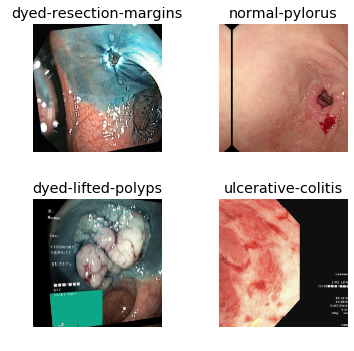

In [ ]:
print(data.classes)
data.show_batch(rows=2, figsize=(5,5))

* # CHOOSING THE TRANSFER LEARNING MODEL HERE - resnet18,34,50,101,152 , densenet121,169,201,161 , vgg16_bn,19_bn

In [ ]:
learner = cnn_learner(data, models.resnet34, metrics=[accuracy, error_rate], callback_fns=ShowGraph)
x = 'resnet34'

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /tmp/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:04<00:00, 21.7MB/s]


In [ ]:
learner.model_dir='/kaggle/working/'
learner.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.02E-03
Min loss divided by 10: 1.00E-02
CPU times: user 5.57 s, sys: 1.21 s, total: 6.78 s
Wall time: 2min 54s


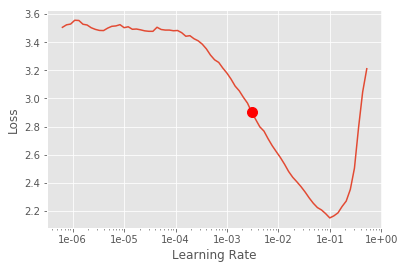

In [ ]:
%%time
learner.lr_find()
learner.recorder.plot(suggestion=True)

In [ ]:
min_grad_lr = learner.recorder.min_grad_lr
min_grad_lr

0.0030199517204020187

In [ ]:
learner.model_dir='/kaggle/working/'
def learner_outputs():
    interpreter = ClassificationInterpretation.from_learner(learner)
    print(interpreter.most_confused(min_val=2))
    interpreter.plot_top_losses(4, figsize=(10,10), heatmap = True)
    interpreter.plot_confusion_matrix(figsize=(8,8), dpi=120)

# STAGE - 1

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.746544,0.450446,0.822500,0.177500,07:38
1,0.536673,0.345715,0.867500,0.132500,07:24
2,0.442619,0.300628,0.884687,0.115313,07:32
3,0.392125,0.248281,0.892812,0.107188,07:24
4,0.309004,0.208555,0.921875,0.078125,07:26
5,0.265076,0.214128,0.917500,0.082500,07:23
6,0.254660,0.190446,0.927813,0.072187,07:27
7,0.239795,0.176266,0.930938,0.069063,07:26
8,0.217291,0.163797,0.930625,0.069375,07:22
9,0.211206,0.164554,0.930938,0.069063,07:33


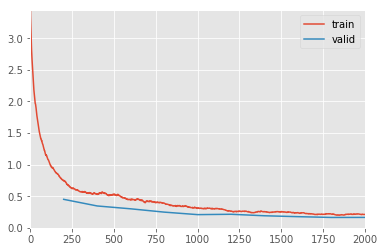

Better model found at epoch 0 with accuracy value: 0.8224999904632568.
Better model found at epoch 1 with accuracy value: 0.8675000071525574.
Better model found at epoch 2 with accuracy value: 0.8846874833106995.
Better model found at epoch 3 with accuracy value: 0.8928124904632568.
Better model found at epoch 4 with accuracy value: 0.921875.
Better model found at epoch 6 with accuracy value: 0.9278125166893005.
Better model found at epoch 7 with accuracy value: 0.9309375286102295.


[('esophagitis', 'normal-z-line', 94), ('normal-z-line', 'esophagitis', 29), ('dyed-lifted-polyps', 'dyed-resection-margins', 26), ('dyed-resection-margins', 'dyed-lifted-polyps', 20), ('ulcerative-colitis', 'polyps', 10), ('normal-cecum', 'ulcerative-colitis', 7), ('polyps', 'ulcerative-colitis', 7), ('normal-cecum', 'polyps', 5), ('polyps', 'normal-cecum', 5), ('polyps', 'normal-pylorus', 4), ('esophagitis', 'normal-pylorus', 3), ('ulcerative-colitis', 'normal-cecum', 3), ('normal-pylorus', 'ulcerative-colitis', 2)]
CPU times: user 2min 9s, sys: 22 s, total: 2min 31s
Wall time: 1h 16min 13s


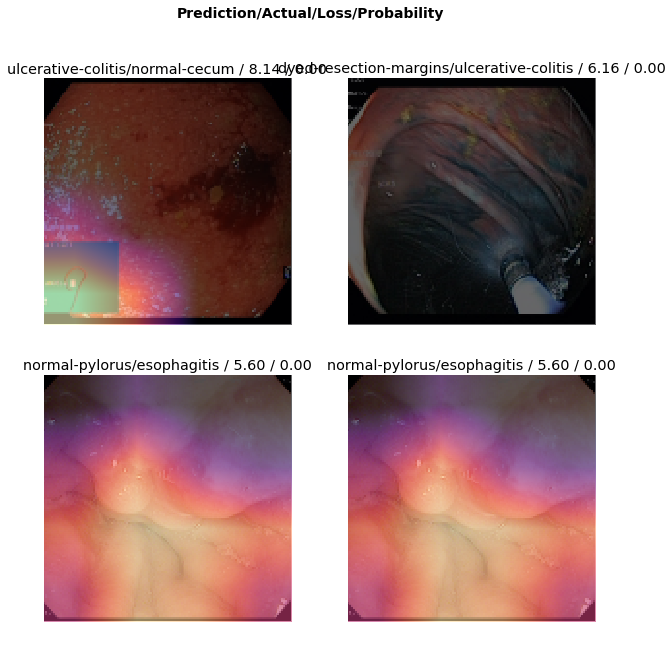

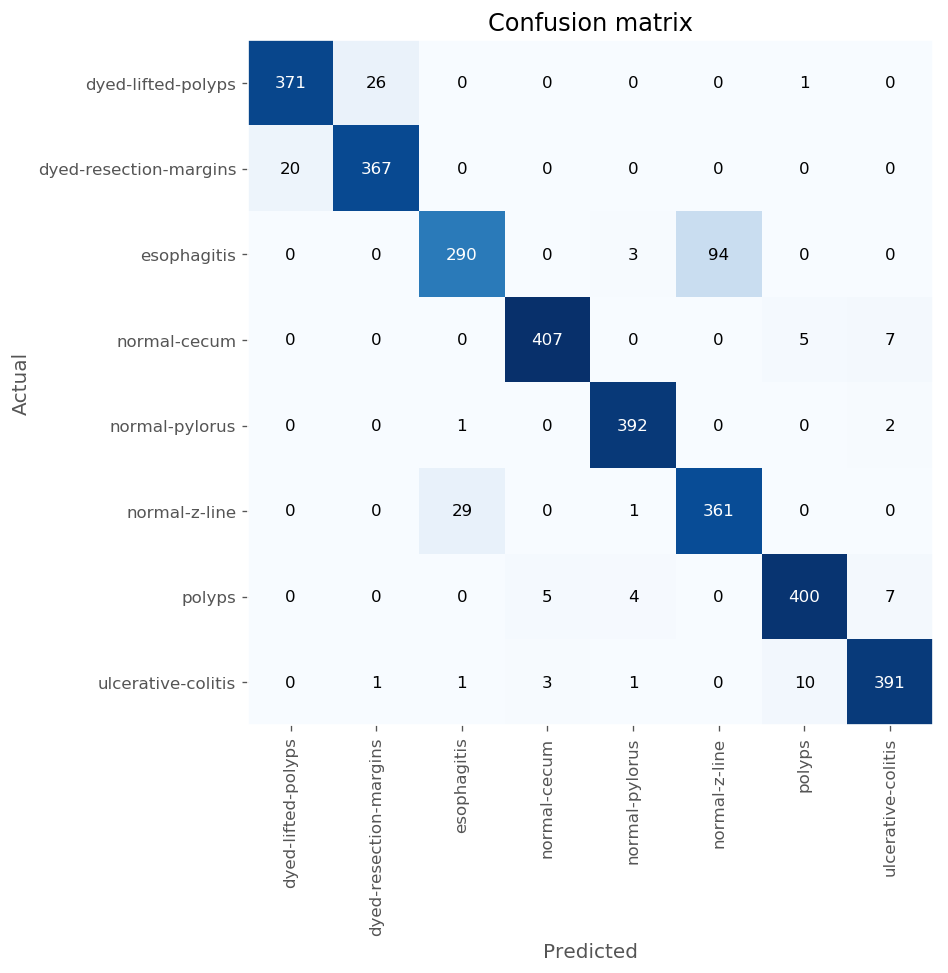

In [ ]:
%%time

i = 1

modelname = ('stage-{}-GASTRO-{}-epoch'.format(i,x))
picklename = ('/kaggle/working/stage-{}-GASTRO-{}.pkl'.format(i,x))

learner.fit_one_cycle(10, callbacks=[SaveModelCallback(learner, every='improvement', monitor='accuracy', name=modelname)], max_lr=slice(1e-3, 1e-2))
learner.save("Final" + modelname)
learner.export(picklename)
learner_outputs()

# STAGE - 2 + UNFREEZED

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.320614,1.028506,0.775937,0.224063,07:26
1,0.397720,1.588979,0.731562,0.268438,07:26
2,0.420591,0.427507,0.825312,0.174688,07:32
3,0.409194,0.525643,0.806250,0.193750,07:25
4,0.379319,0.396190,0.832812,0.167187,07:28
5,0.325127,0.322360,0.877813,0.122188,07:29
6,0.302256,0.352126,0.880625,0.119375,07:25
7,0.256290,0.219451,0.913437,0.086562,07:32
8,0.220489,0.178023,0.929688,0.070312,07:30
9,0.196654,0.149117,0.940625,0.059375,07:27


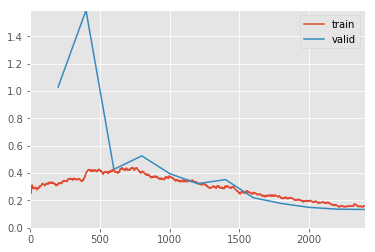

Better model found at epoch 0 with accuracy value: 0.7759374976158142.
Better model found at epoch 2 with accuracy value: 0.8253124952316284.
Better model found at epoch 4 with accuracy value: 0.832812488079071.
Better model found at epoch 5 with accuracy value: 0.8778125047683716.
Better model found at epoch 6 with accuracy value: 0.8806250095367432.
Better model found at epoch 7 with accuracy value: 0.9134374856948853.
Better model found at epoch 8 with accuracy value: 0.9296875.
Better model found at epoch 9 with accuracy value: 0.940625011920929.
Better model found at epoch 10 with accuracy value: 0.9471874833106995.
Better model found at epoch 11 with accuracy value: 0.9478124976158142.


[('esophagitis', 'normal-z-line', 61), ('normal-z-line', 'esophagitis', 42), ('dyed-resection-margins', 'dyed-lifted-polyps', 15), ('dyed-lifted-polyps', 'dyed-resection-margins', 13), ('polyps', 'ulcerative-colitis', 9), ('normal-cecum', 'ulcerative-colitis', 7), ('normal-cecum', 'polyps', 4), ('ulcerative-colitis', 'polyps', 4), ('polyps', 'normal-pylorus', 2)]
CPU times: user 3min 8s, sys: 29 s, total: 3min 37s
Wall time: 1h 31min 23s


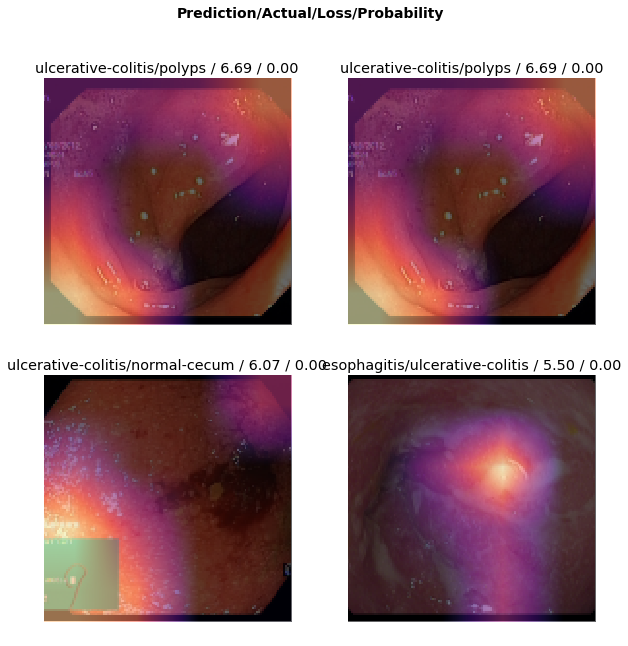

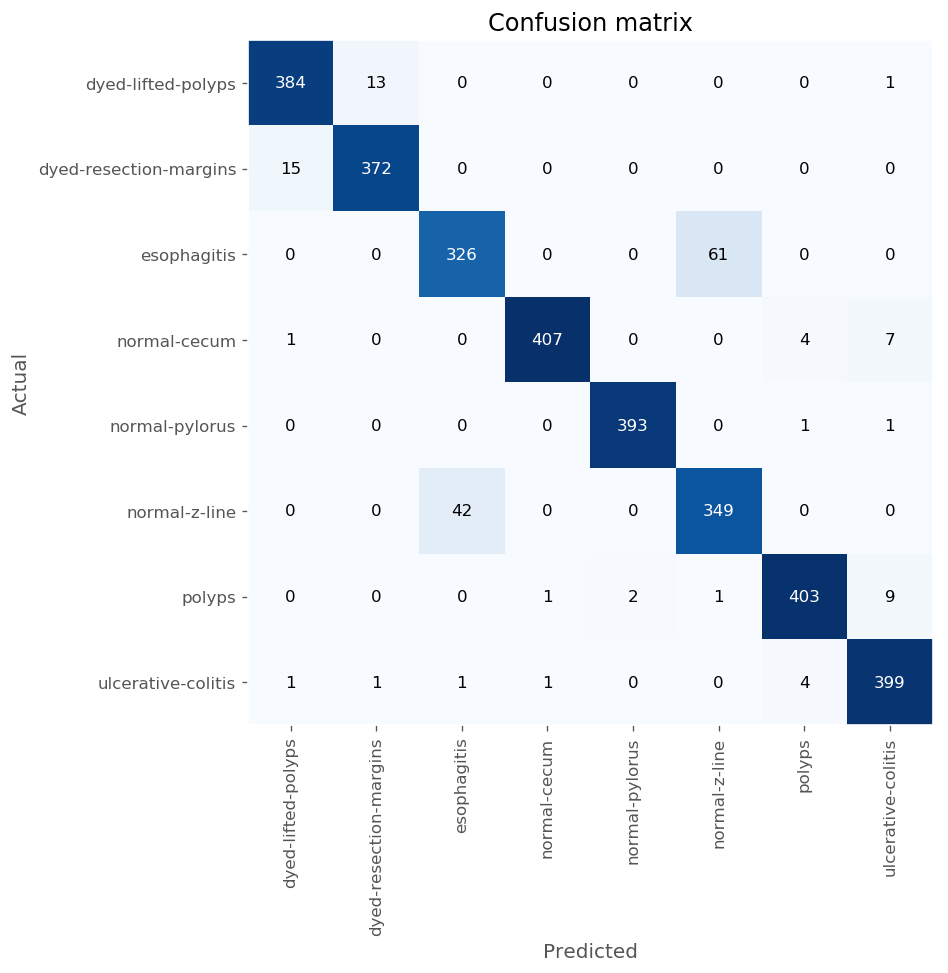

In [ ]:
%%time

i = 2

modelname = ('stage-{}-GASTRO-{}-epoch'.format(i,x))
picklename = ('/kaggle/working/stage-{}-GASTRO-{}.pkl'.format(i,x))

learner.unfreeze()
learner.fit_one_cycle(12, callbacks=[SaveModelCallback(learner, every='improvement', monitor='accuracy', name=modelname)], max_lr=slice(1e-3, 1e-2))
learner.save("Final_" + modelname)
learner.export(picklename)
learner_outputs()


# STAGE - 3

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.164217,0.137758,0.950000,0.050000,07:28
1,0.189065,0.203687,0.923750,0.076250,07:32
2,0.271627,0.195519,0.929688,0.070312,07:24
3,0.301104,0.387967,0.848125,0.151875,07:32
4,0.281378,0.238756,0.912188,0.087812,07:23
5,0.293152,0.201711,0.917813,0.082188,07:35
6,0.235777,0.201488,0.914375,0.085625,07:33
7,0.206301,0.169933,0.930625,0.069375,07:25
8,0.184456,0.148194,0.941250,0.058750,07:25
9,0.171925,0.130303,0.950000,0.050000,07:33


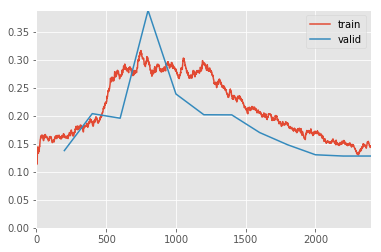

Better model found at epoch 0 with accuracy value: 0.949999988079071.


[('esophagitis', 'normal-z-line', 65), ('normal-z-line', 'esophagitis', 36), ('dyed-resection-margins', 'dyed-lifted-polyps', 16), ('dyed-lifted-polyps', 'dyed-resection-margins', 10), ('normal-cecum', 'polyps', 7), ('ulcerative-colitis', 'polyps', 7), ('polyps', 'ulcerative-colitis', 5), ('normal-cecum', 'ulcerative-colitis', 3), ('polyps', 'normal-pylorus', 3)]
CPU times: user 3min 9s, sys: 25.2 s, total: 3min 34s
Wall time: 1h 31min 21s


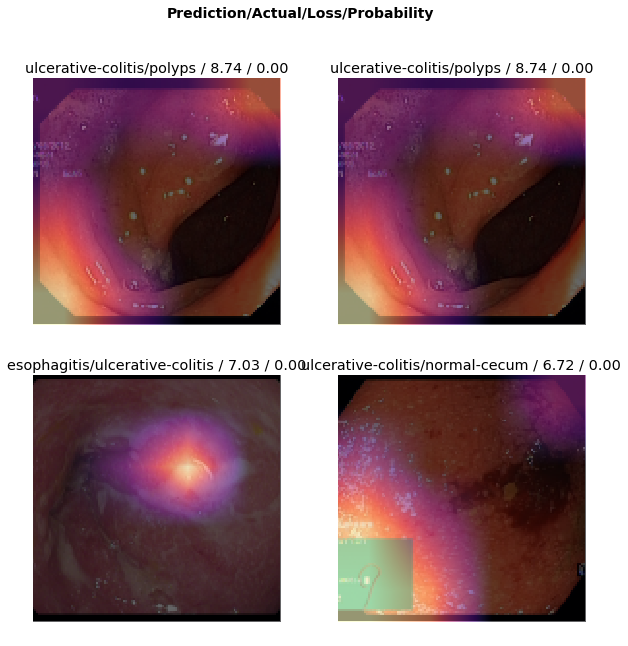

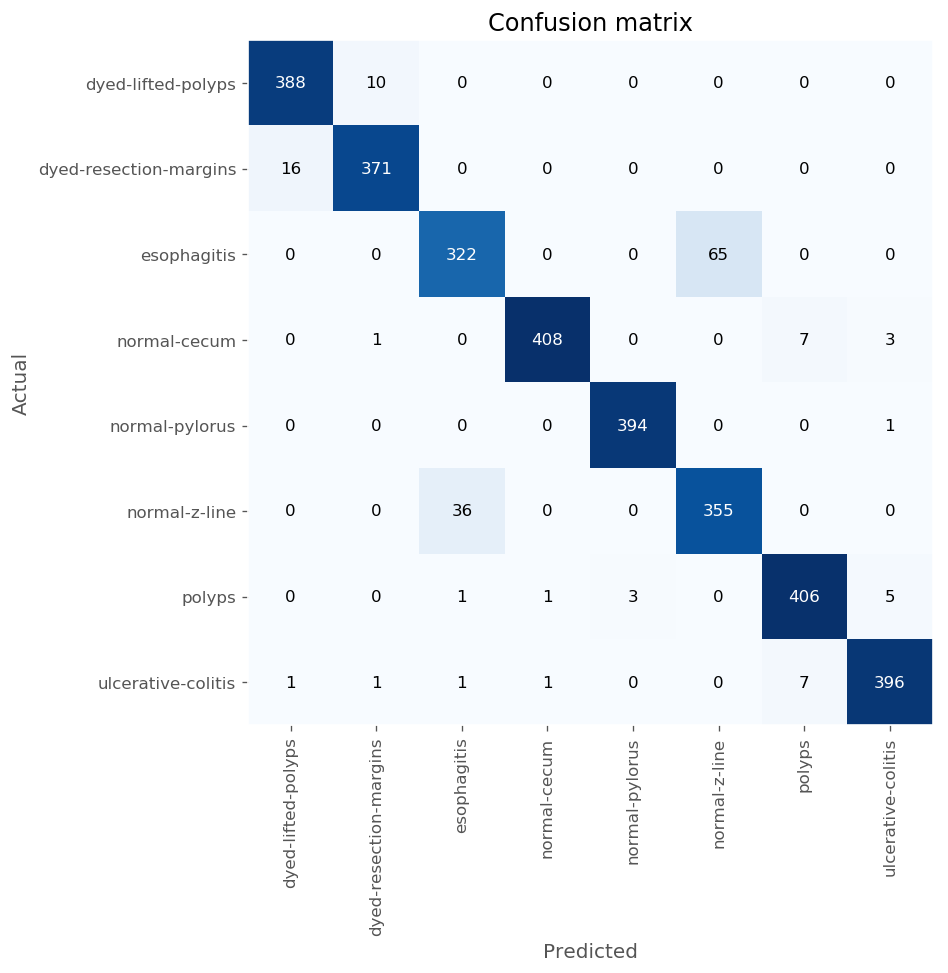

In [ ]:
%%time

i = 3

modelname = ('stage-{}-GASTRO-{}-epoch'.format(i,x))
picklename = ('/kaggle/working/stage-{}-GASTRO-{}.pkl'.format(i,x))

learner.fit_one_cycle(12, callbacks=[SaveModelCallback(learner, every='improvement', monitor='accuracy', name=modelname)], max_lr=slice(1e-3, 1e-2))
learner.save("Final_" + modelname)
learner.export(picklename)
learner_outputs()

# STAGE - 4

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.166497,0.140495,0.946250,0.053750,07:32
1,0.193101,0.205923,0.920313,0.079687,07:25
2,0.285005,0.345474,0.873125,0.126875,07:26
3,0.304055,0.295827,0.888125,0.111875,07:27
4,0.270951,0.246134,0.900625,0.099375,07:24
5,0.271673,0.244102,0.900937,0.099063,07:24
6,0.231240,0.200187,0.917500,0.082500,07:26
7,0.219231,0.175153,0.931562,0.068438,07:21
8,0.186303,0.163128,0.942813,0.057188,07:22
9,0.163376,0.129718,0.948438,0.051562,07:23


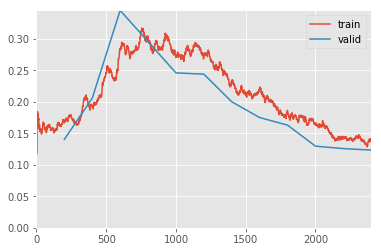

Better model found at epoch 0 with accuracy value: 0.9462500214576721.
Epoch 3: reducing lr to 0.001988830870901824
Epoch 6: reducing lr to 0.001294757995390207
Better model found at epoch 9 with accuracy value: 0.948437511920929.
Better model found at epoch 11 with accuracy value: 0.9537500143051147.


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/content/stage-4-GASTRO-resnet34.pkl'

In [ ]:
%%time

i = 4

modelname = ('stage-{}-GASTRO-{}-epoch'.format(i,x))
picklename = ('/kaggle/working/stage-{}-GASTRO-{}.pkl'.format(i,x))

learner.fit_one_cycle(12, max_lr=slice(1e-3, 1e-2), callbacks=[SaveModelCallback(learner, every='improvement', monitor='accuracy', name = modelname),
                                                               ReduceLROnPlateauCallback(learner, monitor = 'valid_loss', mode = 'auto', patience = 2, factor = 0.2, min_delta = 0.0001, min_lr = 0.001)])
learner.save("Final_" + modelname)
learner.export(picklename)
learner_outputs()